In [1]:

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "diabetes"

In [2]:
library(tidyverse)
library(caret)
library(mice)
library(ggplot2)
library(factoextra)
library(corrplot)
library(randomForest)

# Show uploaded dataset folders
list.files("../input")


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

corrplot 0.92 loaded

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




[1] "diabetes"

In [3]:
# Find folder automatically
data_folder <- list.files("/kaggle/input", full.names = TRUE)[1]

# Find CSV file inside that folder
csv_file <- list.files(data_folder, pattern = "\\.csv$", full.names = TRUE)[1]

# Load dataset
df <- read.csv(csv_file)

df <- as.data.frame(df)
head(df)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,⋯,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,⋯,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,⋯,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,⋯,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,⋯,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,⋯,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,⋯,No,Steady,No,No,No,No,No,No,Yes,>30


In [5]:
for (col in names(df)) {
  if (is.character(df[[col]]) || is.factor(df[[col]])) {
    df[[col]][df[[col]] == "?"] <- NA
  }
}


In [6]:
df <- df %>% select(-any_of(c("encounter_id", "patient_nbr")))


ERROR: Error in df %>% select(-any_of(c("encounter_id", "patient_nbr"))): could not find function "%>%"


In [7]:
df <- df %>% mutate(across(where(is.character), as.factor))


ERROR: Error in df %>% mutate(across(where(is.character), as.factor)): could not find function "%>%"


In [7]:
colSums(is.na(df))
vis_miss(df)


race                   gender                      age 
                    2273                        0                        0 
                  weight        admission_type_id discharge_disposition_id 
                   98569                        0                        0 
     admission_source_id         time_in_hospital               payer_code 
                       0                        0                    40256 
       medical_specialty       num_lab_procedures           num_procedures 
                   49949                        0                        0 
         num_medications        number_outpatient         number_emergency 
                       0                        0                        0 
        number_inpatient                   diag_1                   diag_2 
                       0                       21                      358 
                  diag_3         number_diagnoses            max_glu_serum 
                    1423                        0                        0 
               A1Cresult                metformin              repaglinide 
                       0                        0                        0 
             nateglinide           chlorpropamide              glimepiride 
                       0                        0                        0 
           acetohexamide                glipizide                glyburide 
                       0                        0                        0 
             tolbutamide             pioglitazone            rosiglitazone 
                       0                        0                        0 
                acarbose                 miglitol             troglitazone 
                       0                        0                        0 
              tolazamide                  examide              citoglipton 
                       0                        0                        0 
                 insulin      glyburide.metformin      glipizide.metformin 
                       0                        0                        0 
glimepiride.pioglitazone  metformin.rosiglitazone   metformin.pioglitazone 
                       0                        0                        0 
                  change              diabetesMed               readmitted 
                       0                        0                        0

ERROR: Error in vis_miss(df): could not find function "vis_miss"


[1] "Missing value count per column:"
            encounter_id              patient_nbr                     race 
                       0                        0                     2273 
                  gender                      age                   weight 
                       0                        0                    98569 
       admission_type_id discharge_disposition_id      admission_source_id 
                       0                        0                        0 
        time_in_hospital               payer_code        medical_specialty 
                       0                    40256                    49949 
      num_lab_procedures           num_procedures          num_medications 
                       0                        0                        0 
       number_outpatient         number_emergency         number_inpatient 
                       0                        0                        0 
                  diag_1                   diag_2 

ERROR: Error in df %>% select(-any_of(c("encounter_id", "patient_nbr"))): could not find function "%>%"


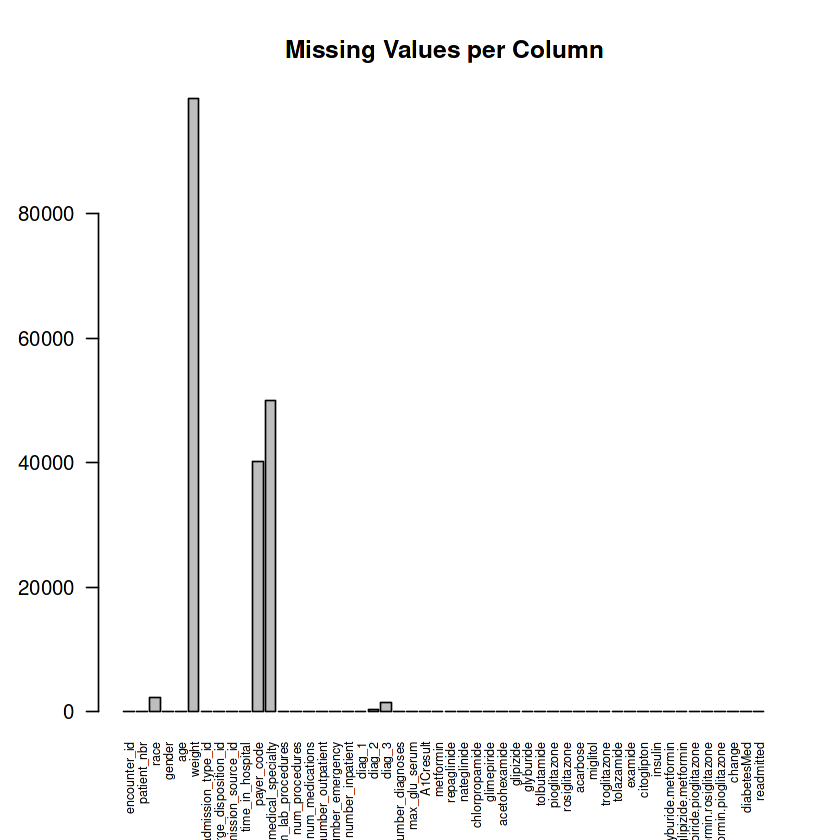

In [3]:


############################################################
# LOAD DATA FROM KAGGLE INPUT DIRECTORY
############################################################
df <- read.csv("/kaggle/input/diabetes/diabetic_data.csv")
df <- as.data.frame(df)

############################################################
# REPLACE '?' WITH NA
############################################################
for (col in names(df)) {
  if (is.character(df[[col]]) | is.factor(df[[col]])) {
    df[[col]][df[[col]] == "?"] <- NA
  }
}

############################################################
# MISSING VALUES SUMMARY
############################################################
print("Missing value count per column:")
print(colSums(is.na(df)))

# SIMPLE VISUAL ALTERNATIVE
missing_plot <- colSums(is.na(df))
barplot(missing_plot, las=2, cex.names=0.6, main="Missing Values per Column")

############################################################
# REMOVE IDENTIFICATION COLUMNS SAFELY
############################################################
df <- df %>% select(-any_of(c("encounter_id", "patient_nbr")))

############################################################
# MICE IMPUTATION
############################################################
set.seed(123)
mice_mod <- mice(df, m = 1, maxit = 5, method = "pmm", seed = 123)
df_imputed <- complete(mice_mod)

############################################################
# DUMMY ENCODING
############################################################
df_encoded <- dummy_cols(
  df_imputed,
  remove_first_dummy = TRUE,
  remove_selected_columns = TRUE
)

############################################################
# OUTLIER DETECTION (Z-SCORE)
############################################################
numeric_cols <- df_encoded %>% select(where(is.numeric))
z_scores <- scale(numeric_cols)
outliers <- abs(z_scores) > 3

print("Total outliers detected:")
print(sum(outliers))

############################################################
# PCA
############################################################
numeric_scaled <- scale(numeric_cols)
pca_res <- prcomp(numeric_scaled, center = TRUE, scale. = TRUE)

fviz_eig(pca_res)
fviz_pca_biplot(pca_res)

############################################################
# FREQUENT PATTERN MINING
############################################################
rules_df <- df_imputed %>% select(diabetesMed, change, readmitted)
rules_df <- as.data.frame(apply(rules_df, 2, as.factor))

rules <- apriori(rules_df, parameter = list(supp = 0.01, conf = 0.5))

print("Top 10 Association Rules:")
inspect(rules[1:10])

############################################################
# K-MEANS
############################################################
set.seed(123)
kmeans_res <- kmeans(numeric_scaled, centers = 3, nstart = 25)

print("K-means results:")
print(kmeans_res)

fviz_cluster(kmeans_res, data = numeric_scaled)


In [ ]:
### ---------------------------
### Minimal, robust Kaggle R pipeline
###  - auto-detects CSV in /kaggle/input
###  - cleans, imputes, encodes, PCA, kmeans, RF
### ---------------------------

# Install only if not present (small helper)
pkg_install_if_missing <- function(pkgs){
  for (p in pkgs) {
    if (!requireNamespace(p, quietly = TRUE)) {
      install.packages(p, repos = "https://cloud.r-project.org")
    }
    library(p, character.only = TRUE)
  }
}

# Packages we'll use (small & stable)
pkg_install_if_missing(c("data.table", "dplyr", "ggplot2", "mice", "randomForest"))

# show input folders
cat("Input folders:\n")
print(list.files("/kaggle/input"))

# find first csv in the first input folder that contains csvs
input_folders <- list.files("/kaggle/input", full.names = TRUE)
csv_path <- NULL
for (f in input_folders) {
  csvs <- list.files(f, pattern = "\\.csv$", full.names = TRUE)
  if (length(csvs) > 0) { csv_path <- csvs[1]; break }
}
if (is.null(csv_path)) stop("No CSV found under /kaggle/input. Please add dataset via Add Data.")

cat("Using CSV:", csv_path, "\n\n")

# Read
library(data.table)
df <- fread(csv_path, na.strings = c("NA","", "NaN"), data.table = FALSE)

# Ensure standard R data.frame
df <- as.data.frame(df)
cat("Initial rows,cols:", dim(df), "\n")

# Replace "?" with NA safely column by column
for (nm in names(df)) {
  if (is.factor(df[[nm]])) df[[nm]] <- as.character(df[[nm]])
  if (is.character(df[[nm]])) {
    df[[nm]][ df[[nm]] == "?" ] <- NA
  }
}

# quick missing summary
miss_counts <- sapply(df, function(x) sum(is.na(x)))
print("Missing per column (top 30):")
print(head(sort(miss_counts, decreasing = TRUE), 30))

# remove common id cols if present
id_cols <- c("encounter_id", "patient_nbr")
id_present <- intersect(id_cols, names(df))
if (length(id_present) > 0) {
  df <- df[ , setdiff(names(df), id_present), drop = FALSE]
  cat("Removed id cols:", paste(id_present, collapse = ", "), "\n")
}

# Convert empty-character columns to NA and factors where appropriate
for (nm in names(df)) {
  if (is.character(df[[nm]])) {
    df[[nm]] <- trimws(df[[nm]])
    df[[nm]][ df[[nm]] == "" ] <- NA
    # keep as character for now or convert to factor later as needed
  }
}

# Attempt mice imputation — if it fails, fall back to simple imputation
imputed_df <- NULL
try({
  library(mice)
  # choose columns for mice (drop columns with >80% missing)
  pct_missing <- sapply(df, function(x) mean(is.na(x)))
  use_cols <- names(pct_missing)[pct_missing <= 0.8]
  # set method automatically
  mdf <- df[ , use_cols, drop = FALSE]
  # mice needs factors to be factors
  mdf[] <- lapply(mdf, function(x) if (is.character(x)) as.factor(x) else x)
  mice_mod <- mice(mdf, m = 1, maxit = 5, method = "pmm", printFlag = FALSE)
  imputed_df <- complete(mice_mod, 1)
  # merge imputed back into full df (only for used cols)
  df[ , use_cols] <- imputed_df
  cat("MICE imputation succeeded.\n")
}, silent = TRUE)

# Fallback simple imputation if mice failed
if (is.null(imputed_df)) {
  cat("MICE failed or skipped — using simple median/mode imputation.\n")
  for (nm in names(df)) {
    if (is.numeric(df[[nm]])) {
      med <- median(df[[nm]], na.rm = TRUE)
      df[[nm]][is.na(df[[nm]])] <- med
    } else {
      # character/factor: fill with most common value (mode)
      vals <- na.omit(df[[nm]])
      if (length(vals) == 0) {
        df[[nm]][is.na(df[[nm]])] <- NA_character_
      } else {
        modev <- names(sort(table(vals), decreasing = TRUE))[1]
        df[[nm]][is.na(df[[nm]])] <- modev
      }
    }
  }
}

# Convert obvious character columns to factor (but keep numeric as numeric)
# Identify columns that look numeric but stored as character and coerce
for (nm in names(df)) {
  if (is.character(df[[nm]])) {
    # if >90% of non-NA entries are numeric-like, coerce to numeric
    vals <- na.omit(df[[nm]])
    if (length(vals) > 0 && all(grepl("^[-0-9.]+$", vals))) {
      df[[nm]] <- as.numeric(df[[nm]])
    } else {
      df[[nm]] <- as.factor(df[[nm]])
    }
  }
}

# Prepare dataset for modeling: create numeric matrix via model.matrix (one-hot)
# Remove target 'readmitted' from matrix if present; keep separately
target_name <- "readmitted"
y <- NULL
if (target_name %in% names(df)) {
  y <- df[[target_name]]
  df_for_matrix <- df[ , setdiff(names(df), target_name), drop = FALSE]
} else {
  df_for_matrix <- df
}

# Build model matrix (this does one-hot encoding for factors)
mm <- model.matrix(~ . -1, data = df_for_matrix)   # -1 removes intercept
mm <- as.data.frame(mm)

# Remove columns with NA or infinite (defensive)
is_finite_col <- sapply(mm, function(x) all(is.finite(as.numeric(x))))
mm <- mm[ , is_finite_col, drop = FALSE]

cat("Final numeric features:", ncol(mm), "rows:", nrow(mm), "\n")

# PCA on numeric features (center+scale)
num_mat <- scale(as.matrix(mm))
pca_res <- prcomp(num_mat, center = TRUE, scale. = TRUE)
# show variance explained
ve <- summary(pca_res)$importance[2, ]
cat("Top 10 PCA variance explained:\n"); print(round(ve[1:10], 4))

# Simple scree plot
png("pca_scree.png", width = 800, height = 480)
plot(ve, type = "b", xlab = "PC", ylab = "Proportion Var", main = "PCA Scree (Proportion Var)")
dev.off()
cat("Saved pca_scree.png\n")

# K-means clustering (use first few PCs for speed)
pcs_use <- pca_res$x[ , 1:5, drop = FALSE]
set.seed(42)
k <- 3
km <- kmeans(pcs_use, centers = k, nstart = 25)
# save cluster result
cluster_assign <- km$cluster

# Plot two PCs colored by cluster
library(ggplot2)
df_pcs <- data.frame(PC1 = pcs_use[,1], PC2 = pcs_use[,2], cluster = factor(cluster_assign))
png("kmeans_pcs.png", width = 800, height = 480)
ggplot(df_pcs, aes(x = PC1, y = PC2, color = cluster)) + geom_point(alpha = 0.6) +
  ggtitle("K-means on first 2 PCs")
dev.off()
cat("Saved kmeans_pcs.png\n")

# If target exists, build a Random Forest and evaluate
if (!is.null(y)) {
  # ensure y is factor
  y <- as.factor(y)
  # combine mm and y into a frame
  data_rf <- cbind(mm, .y = y)
  # simple train/test split 80/20
  set.seed(123)
  n <- nrow(data_rf)
  train_idx <- sample(seq_len(n), size = floor(0.8 * n))
  train <- data_rf[train_idx, , drop = FALSE]
  test  <- data_rf[-train_idx, , drop = FALSE]
  # fit randomForest
  library(randomForest)
  rf <- randomForest(x = train[ , setdiff(names(train), ".y")], y = train$.y,
                     ntree = 200, importance = TRUE)
  print(rf)
  # predict
  pred <- predict(rf, newdata = test[ , setdiff(names(test), ".y")])
  cm <- table(Prediction = pred, Truth = test$.y)
  cat("Confusion table (pred vs truth):\n"); print(cm)
  acc <- sum(diag(cm)) / sum(cm)
  cat(sprintf("Overall accuracy on test: %.4f\n", acc))
  # variable importance (top 20)
  imp <- importance(rf, type = 2)
  imp_df <- data.frame(feature = rownames(imp), MeanDecreaseGini = imp[,1])
  imp_df <- imp_df[order(-imp_df$MeanDecreaseGini), ]
  print(head(imp_df, 20))
  # Save model (optional)
  saveRDS(rf, file = "rf_model.rds")
  cat("Saved random forest model to rf_model.rds\n")
}

# Save processed numeric dataset for future (small file)
write.csv(mm, "processed_numeric_features.csv", row.names = FALSE)
cat("Saved processed_numeric_features.csv\n")

cat("Pipeline complete.\n")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




Input folders:
[1] "diabetes"
Using CSV: /kaggle/input/diabetes/diabetic_data.csv 

Initial rows,cols: 101766 50 
[1] "Missing per column (top 30):"
                  weight        medical_specialty               payer_code 
                   98569                    49949                    40256 
                    race                   diag_3                   diag_2 
                    2273                     1423                      358 
                  diag_1             encounter_id              patient_nbr 
                      21                        0                        0 
                  gender                      age        admission_type_id 
                       0                        0                        0 
discharge_disposition_id      admission_source_id         time_in_hospital 
                       0                        0                        0 
      num_lab_procedures           num_procedures          num_medications 
               

In [2]:
###########################################
# FINAL SIMPLE WORKING CODE FOR KAGGLE R
###########################################

# Load dataset
df <- read.csv("/kaggle/input/diabetes/diabetic_data.csv", stringsAsFactors = FALSE)

# Replace '?' with NA
df[df == "?"] <- NA

# Remove ID columns (always safe)
df$encounter_id <- NULL
df$patient_nbr  <- NULL

# Remove columns with ONLY 1 unique value
df <- df[, sapply(df, function(x) length(unique(na.omit(x))) > 1)]

# Simple imputation:
# numeric → median ; character → mode
for (col in names(df)) {
  if (is.numeric(df[[col]])) {
    df[[col]][is.na(df[[col]])] <- median(df[[col]], na.rm = TRUE)
  } else {
    vals <- na.omit(df[[col]])
    mode_val <- names(sort(table(vals), decreasing = TRUE))[1]
    df[[col]][is.na(df[[col]])] <- mode_val
    df[[col]] <- as.factor(df[[col]])
  }
}

# Extract target
y <- as.factor(df$readmitted)
df$readmitted <- NULL

# Remove columns that became single-level after imputation
df <- df[, sapply(df, function(x) length(unique(x)) > 1)]

# Convert factors to dummy variables
X <- model.matrix(~ . - 1, data = df)

# Train-test split
set.seed(123)
n <- nrow(X)
train_idx <- sample(1:n, n * 0.8)

Xtrain <- X[train_idx, ]
Xtest  <- X[-train_idx, ]
ytrain <- y[train_idx]
ytest  <- y[-train_idx]

# Install & load Random Forest
install.packages("randomForest", repos = "https://cloud.r-project.org")
library(randomForest)

# Train model
rf <- randomForest(x = Xtrain, y = ytrain, ntree = 100)

# Predict
pred <- predict(rf, Xtest)

# Accuracy
accuracy <- mean(pred == ytest)
cat("Model Accuracy:", accuracy, "\n")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository https://cloud.r-project.org/src/contrib:
  cannot open URL 'https://cloud.r-project.org/src/contrib/PACKAGES'”
Warning message:
“package ‘randomForest’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

